In [1]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

/Users/Home/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
iris_data = load_iris() # load the iris dataset

print('Example data: ')
print(iris_data.data[:5])
print('Example labels: ')
print(iris_data.target[:5])

x = iris_data.data
y_ = iris_data.target.reshape(-1, 1) # Convert data to a single column

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)
#print(y)

# Split the data for training and testing 
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20) #proportion(train:test = 80:20)

# Build the model

model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(lr=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model.summary())

# Train the model
history = model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)

# Test on unseen data

results = model.evaluate(test_x, test_y)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Example data: 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Example labels: 
[0 0 0 0 0]
Neural Network Model Summary: 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 10)                50        
_________________________________________________________________
fc2 (Dense)                  (None, 10)                110       
_________________________________________________________________
output (Dense)               (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
 - 0s - loss: 1.2927 - acc: 0.3500
Epoch 2/200
 - 0s - loss: 1.0031 - acc: 0.3583
Epoch 3/200
 - 0s - loss: 0.9168 - acc: 0.3833
Epoch 4/200
 - 0s - loss: 0.8816 - acc: 0.4083
Epoch 5/200
 - 0s - loss: 0.8463 - acc: 0.75

 - 0s - loss: 0.0696 - acc: 0.9833
Epoch 153/200
 - 0s - loss: 0.0748 - acc: 0.9583
Epoch 154/200
 - 0s - loss: 0.0762 - acc: 0.9750
Epoch 155/200
 - 0s - loss: 0.0701 - acc: 0.9667
Epoch 156/200
 - 0s - loss: 0.0716 - acc: 0.9750
Epoch 157/200
 - 0s - loss: 0.0813 - acc: 0.9667
Epoch 158/200
 - 0s - loss: 0.0698 - acc: 0.9750
Epoch 159/200
 - 0s - loss: 0.0698 - acc: 0.9750
Epoch 160/200
 - 0s - loss: 0.0681 - acc: 0.9667
Epoch 161/200
 - 0s - loss: 0.0685 - acc: 0.9750
Epoch 162/200
 - 0s - loss: 0.0729 - acc: 0.9667
Epoch 163/200
 - 0s - loss: 0.0723 - acc: 0.9750
Epoch 164/200
 - 0s - loss: 0.0711 - acc: 0.9750
Epoch 165/200
 - 0s - loss: 0.0684 - acc: 0.9833
Epoch 166/200
 - 0s - loss: 0.0687 - acc: 0.9750
Epoch 167/200
 - 0s - loss: 0.0770 - acc: 0.9583
Epoch 168/200
 - 0s - loss: 0.0824 - acc: 0.9667
Epoch 169/200
 - 0s - loss: 0.0783 - acc: 0.9750
Epoch 170/200
 - 0s - loss: 0.0709 - acc: 0.9750
Epoch 171/200
 - 0s - loss: 0.0755 - acc: 0.9667
Epoch 172/200
 - 0s - loss: 0.0741

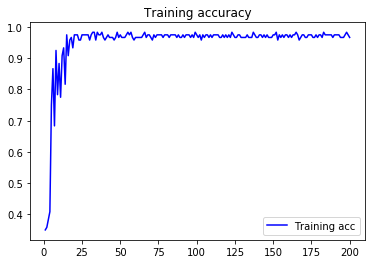

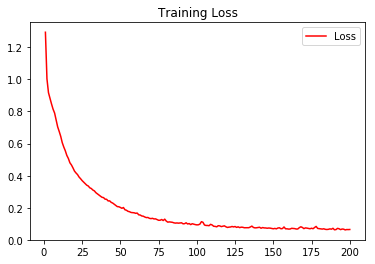

<Figure size 432x288 with 0 Axes>

In [4]:
#history.history
import matplotlib.pyplot as plt
acc= history.history['acc']
#val_acc = history.history['val_acc']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

#plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, acc, 'b', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

#plt.plot(epochs, loss, 'ro', label='Loss')
plt.plot(epochs, loss, 'r', label='Loss')
plt.title('Training Loss')
plt.legend()

plt.figure()
plt.show()

In [5]:
predicted = model.predict(test_x)

In [6]:
print(test_x[:5])
print(test_y[:5])
print(predicted[:5])

[[5.5 4.2 1.4 0.2]
 [5.7 2.9 4.2 1.3]
 [7.7 3.  6.1 2.3]
 [5.4 3.  4.5 1.5]
 [4.5 2.3 1.3 0.3]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
[[9.9997771e-01 2.2261229e-05 6.4752571e-13]
 [3.9278518e-04 9.9289787e-01 6.7094243e-03]
 [9.4095770e-07 1.5885843e-03 9.9841046e-01]
 [4.6213350e-04 8.2138419e-01 1.7815362e-01]
 [9.9672061e-01 3.2794166e-03 2.0774824e-08]]


In [7]:
#Convert predicted result to [0,1]
conv_predicted=[]
for i in predicted:
    sub = []
    max_i = max(i) #search max value in a row
    for j in i:
        if j == max_i:
            j = 1.0 #one for the maximum value
            sub.append(j)
        else:
            j = 0.0 #zeros for others values
            sub.append(j)
    conv_predicted.append(sub)
#Extend the prediction to test_y for comparison
xxx = test_y.tolist() #conv from ndarray to list
yyy = conv_predicted
zzz = []
n = 0
cls = str()

for i in xxx:
    if i == yyy[n]: #check prediction T/F
        cls = 'T'
    else:
        cls = 'F'
    u=i
    u.extend(yyy[n])
    u.extend(cls)
    zzz.append(u) #7columns result
    n+=1
compare_column_name = iris_data.target_names.tolist()
compare_column_name.extend(['SETOSA', 'VERSICOLOR', 'VIRGINICA','class'])

In [8]:
import pandas as pd
df = pd.DataFrame(zzz,columns = compare_column_name)
df

,setosa,versicolor,virginica,SETOSA,VERSICOLOR,VIRGINICA,class
0,1.0,0.0,0.0,1.0,0.0,0.0,T
1,0.0,1.0,0.0,0.0,1.0,0.0,T
2,0.0,0.0,1.0,0.0,0.0,1.0,T
3,0.0,1.0,0.0,0.0,1.0,0.0,T
4,1.0,0.0,0.0,1.0,0.0,0.0,T
5,0.0,1.0,0.0,0.0,1.0,0.0,T
6,1.0,0.0,0.0,1.0,0.0,0.0,T
7,1.0,0.0,0.0,1.0,0.0,0.0,T
8,1.0,0.0,0.0,1.0,0.0,0.0,T
9,1.0,0.0,0.0,1.0,0.0,0.0,T
